In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [ ]:
from get_movie_features import movie_feature

In [3]:
movies_metadata = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\movies_metadata.csv'
links_small = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\links_small.csv'
credits_ = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\credits.csv'
keywords = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\keywords.csv'
rating = r'E:\School\DE_AN\Movie-Recommendation-System\src\data\ratings_small.csv'

In [4]:
movie_df = movie_feature(movies_metadata, links_small, credits_, keywords)
rating_df = pd.read_csv(rating)

In [5]:
movie_df.head(1)

,id,movieId,title,genres,description,keywords,cast,director,spoken_languages,production_companies,production_countries,popularity,year,vote_average,vote_count,wr
0,862,1,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[jealousi, toy, boy, friendship, friend, rival...","[tomhanks, timallen, donrickles]",johnlasseter,[English],[Pixar Animation Studios],[United States of America],21.946943,1995,7,5415,6.86977


## Which are the popular Genres among users?

In [11]:
# Number of unique genres
print(movie_df.genres.explode().nunique())
movie_df.genres.explode().unique()

20


array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', nan, 'Western', 'TV Movie'], dtype=object)

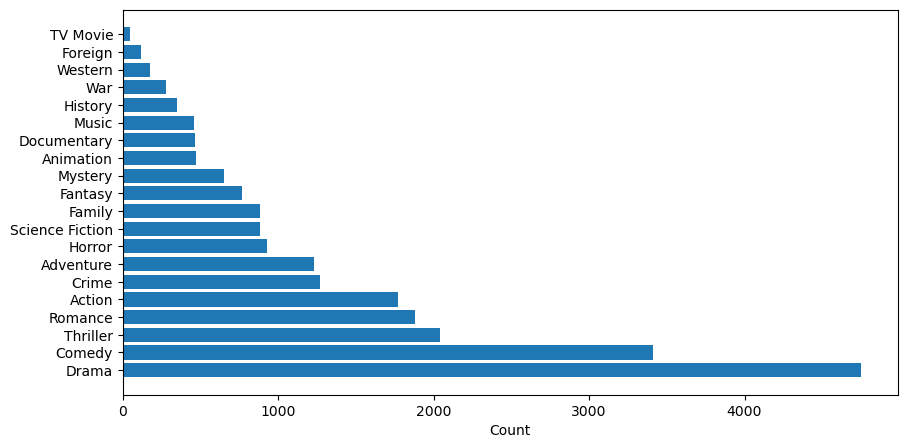

In [10]:
# Number of genres appearance
genres_dist = movie_df.genres.explode().value_counts().sort_values(ascending=False)

figure = plt.figure(figsize=(10, 5))
plt.barh(genres_dist.index, genres_dist.values)
plt.xlabel('Count')
plt.show()

## Movie Features

In [25]:
print('Number of unique movies:', movie_df.movieId.nunique())
print('Number of spoken languages:', movie_df.spoken_languages.explode().nunique())
print('Number of director:', movie_df.director.nunique())
print('Number of cast:', movie_df.cast.explode().nunique())
print('Number of production company:', movie_df.production_companies.explode().nunique())
print('Number of production country:', movie_df.production_countries.explode().nunique())
print('Number of keywords:', movie_df.keywords.explode().nunique())

Number of unique movies: 9082
Number of spoken languages: 66
Number of director: 3602
Number of cast: 10368
Number of production company: 7407
Number of production country: 95
Number of keywords: 6466


## Number of rating per users

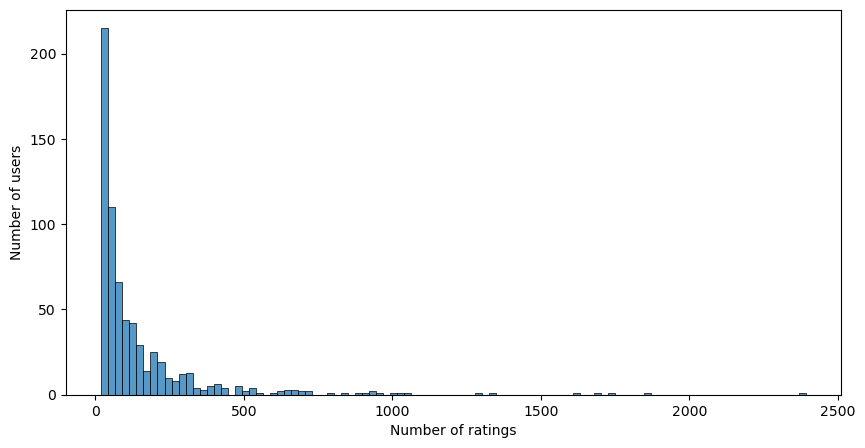

In [43]:
# number of rating per user
n_rating = rating_df.groupby('userId')['movieId'].count()

plt.figure(figsize=(10, 5))
sns.histplot(data=n_rating, x = n_rating.values, bins=100)
plt.ylabel('Number of users')
plt.xlabel('Number of ratings')
plt.show()

In [9]:
# number of users that have rated above 50 movies

len(n_rating[n_rating.values > 50]) / n_rating.shape[0]

0.6274217585692996

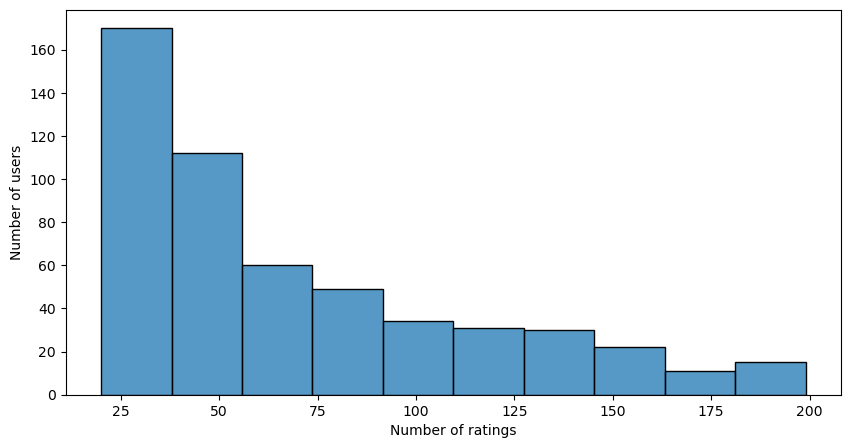

In [47]:
# number of users that have rated below 200 movies

t = n_rating[n_rating.values < 200]
plt.figure(figsize=(10, 5))
sns.histplot(data=t, x =t.values, bins=10)
plt.ylabel('Number of users')
plt.xlabel('Number of ratings')
plt.show()

# Rating distribution

<Axes: xlabel='rating', ylabel='Count'>

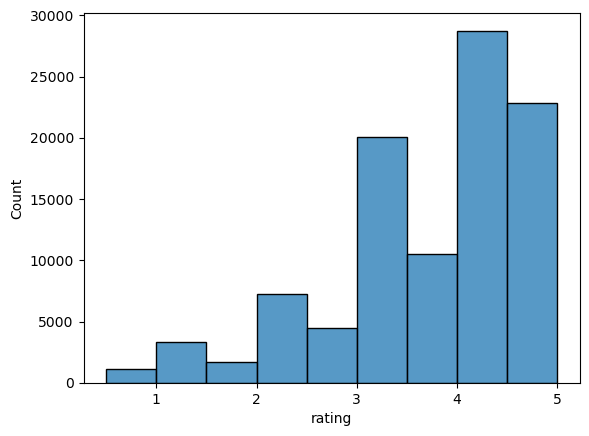

In [65]:
sns.histplot(rating_df.rating, binwidth=0.5)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_df, test_df = train_test_split(rating_df, test_size=0.25, stratify=rating_df['userId'], random_state=42)

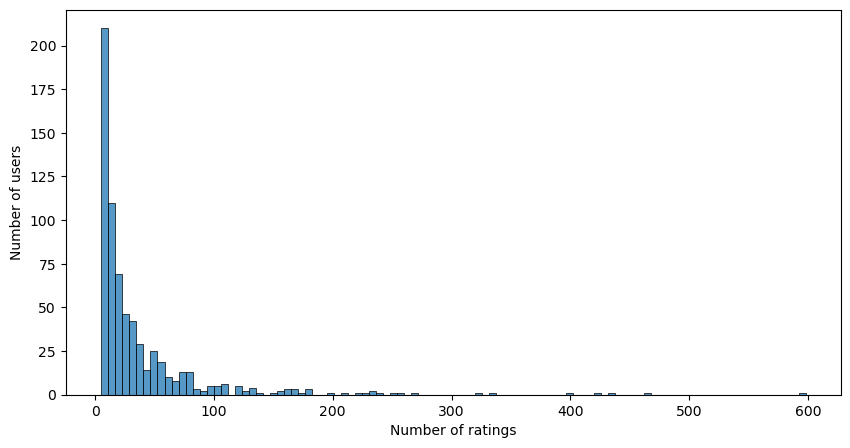

In [9]:
n_rating = test_df.groupby('userId')['movieId'].count()
plt.figure(figsize=(10, 5))
sns.histplot(data=n_rating, x = n_rating.values, bins=100)
plt.ylabel('Number of users')
plt.xlabel('Number of ratings')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [21]:
le.fit(movie_df.genres.explode().unique())
list(enumerate(le.classes_))

[(0, 'Action'),
 (1, 'Adventure'),
 (2, 'Animation'),
 (3, 'Comedy'),
 (4, 'Crime'),
 (5, 'Documentary'),
 (6, 'Drama'),
 (7, 'Family'),
 (8, 'Fantasy'),
 (9, 'Foreign'),
 (10, 'History'),
 (11, 'Horror'),
 (12, 'Music'),
 (13, 'Mystery'),
 (14, 'Romance'),
 (15, 'Science Fiction'),
 (16, 'TV Movie'),
 (17, 'Thriller'),
 (18, 'War'),
 (19, 'Western'),
 (20, nan)]

In [23]:
movie_df.genres.apply(lambda x: [le.transform(i) for i in x])

ValueError: y should be a 1d array, got an array of shape () instead.

In [13]:
le.fit_transform(movie_df.genres)
movie_df.genres.apply(lambda x: [le.f])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

In [14]:
movie_df.genres.explode()

0             Animation
0                Comedy
0                Family
1             Adventure
1               Fantasy
             ...       
9217              Drama
9217             Horror
9217    Science Fiction
9218        Documentary
9218              Music
Name: genres, Length: 22850, dtype: object

In [16]:
movie_df.iloc[9217]

id                                                                 315011
movieId                                                            163056
title                                                       Shin Godzilla
genres                  [Action, Adventure, Drama, Horror, Science Fic...
description             From the mind behind Evangelion comes a hit la...
keywords                 [monster, godzilla, giantmonst, destruct, kaiju]
cast                    [hirokihasegawa, yutakatakenouchi, satomiishih...
director                                                      hideakianno
spoken_languages                        [Italiano, Deutsch, English, 日本語]
production_companies                          [Cine Bazar, Toho Pictures]
production_countries                                              [Japan]
popularity                                                       9.285519
year                                                                 2016
vote_average                          

In [ ]:
# Label Encode features: genres, director, spoken_languages, production_countries, 